In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [25]:
import wget
wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")

'ChurnData (1).csv'

In [26]:
df=pd.read_csv("ChurnData.csv")

In [27]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [28]:
df=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

In [29]:
df['churn']=df['churn'].astype(int)

In [30]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [31]:
df.shape

(200, 10)

In [32]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


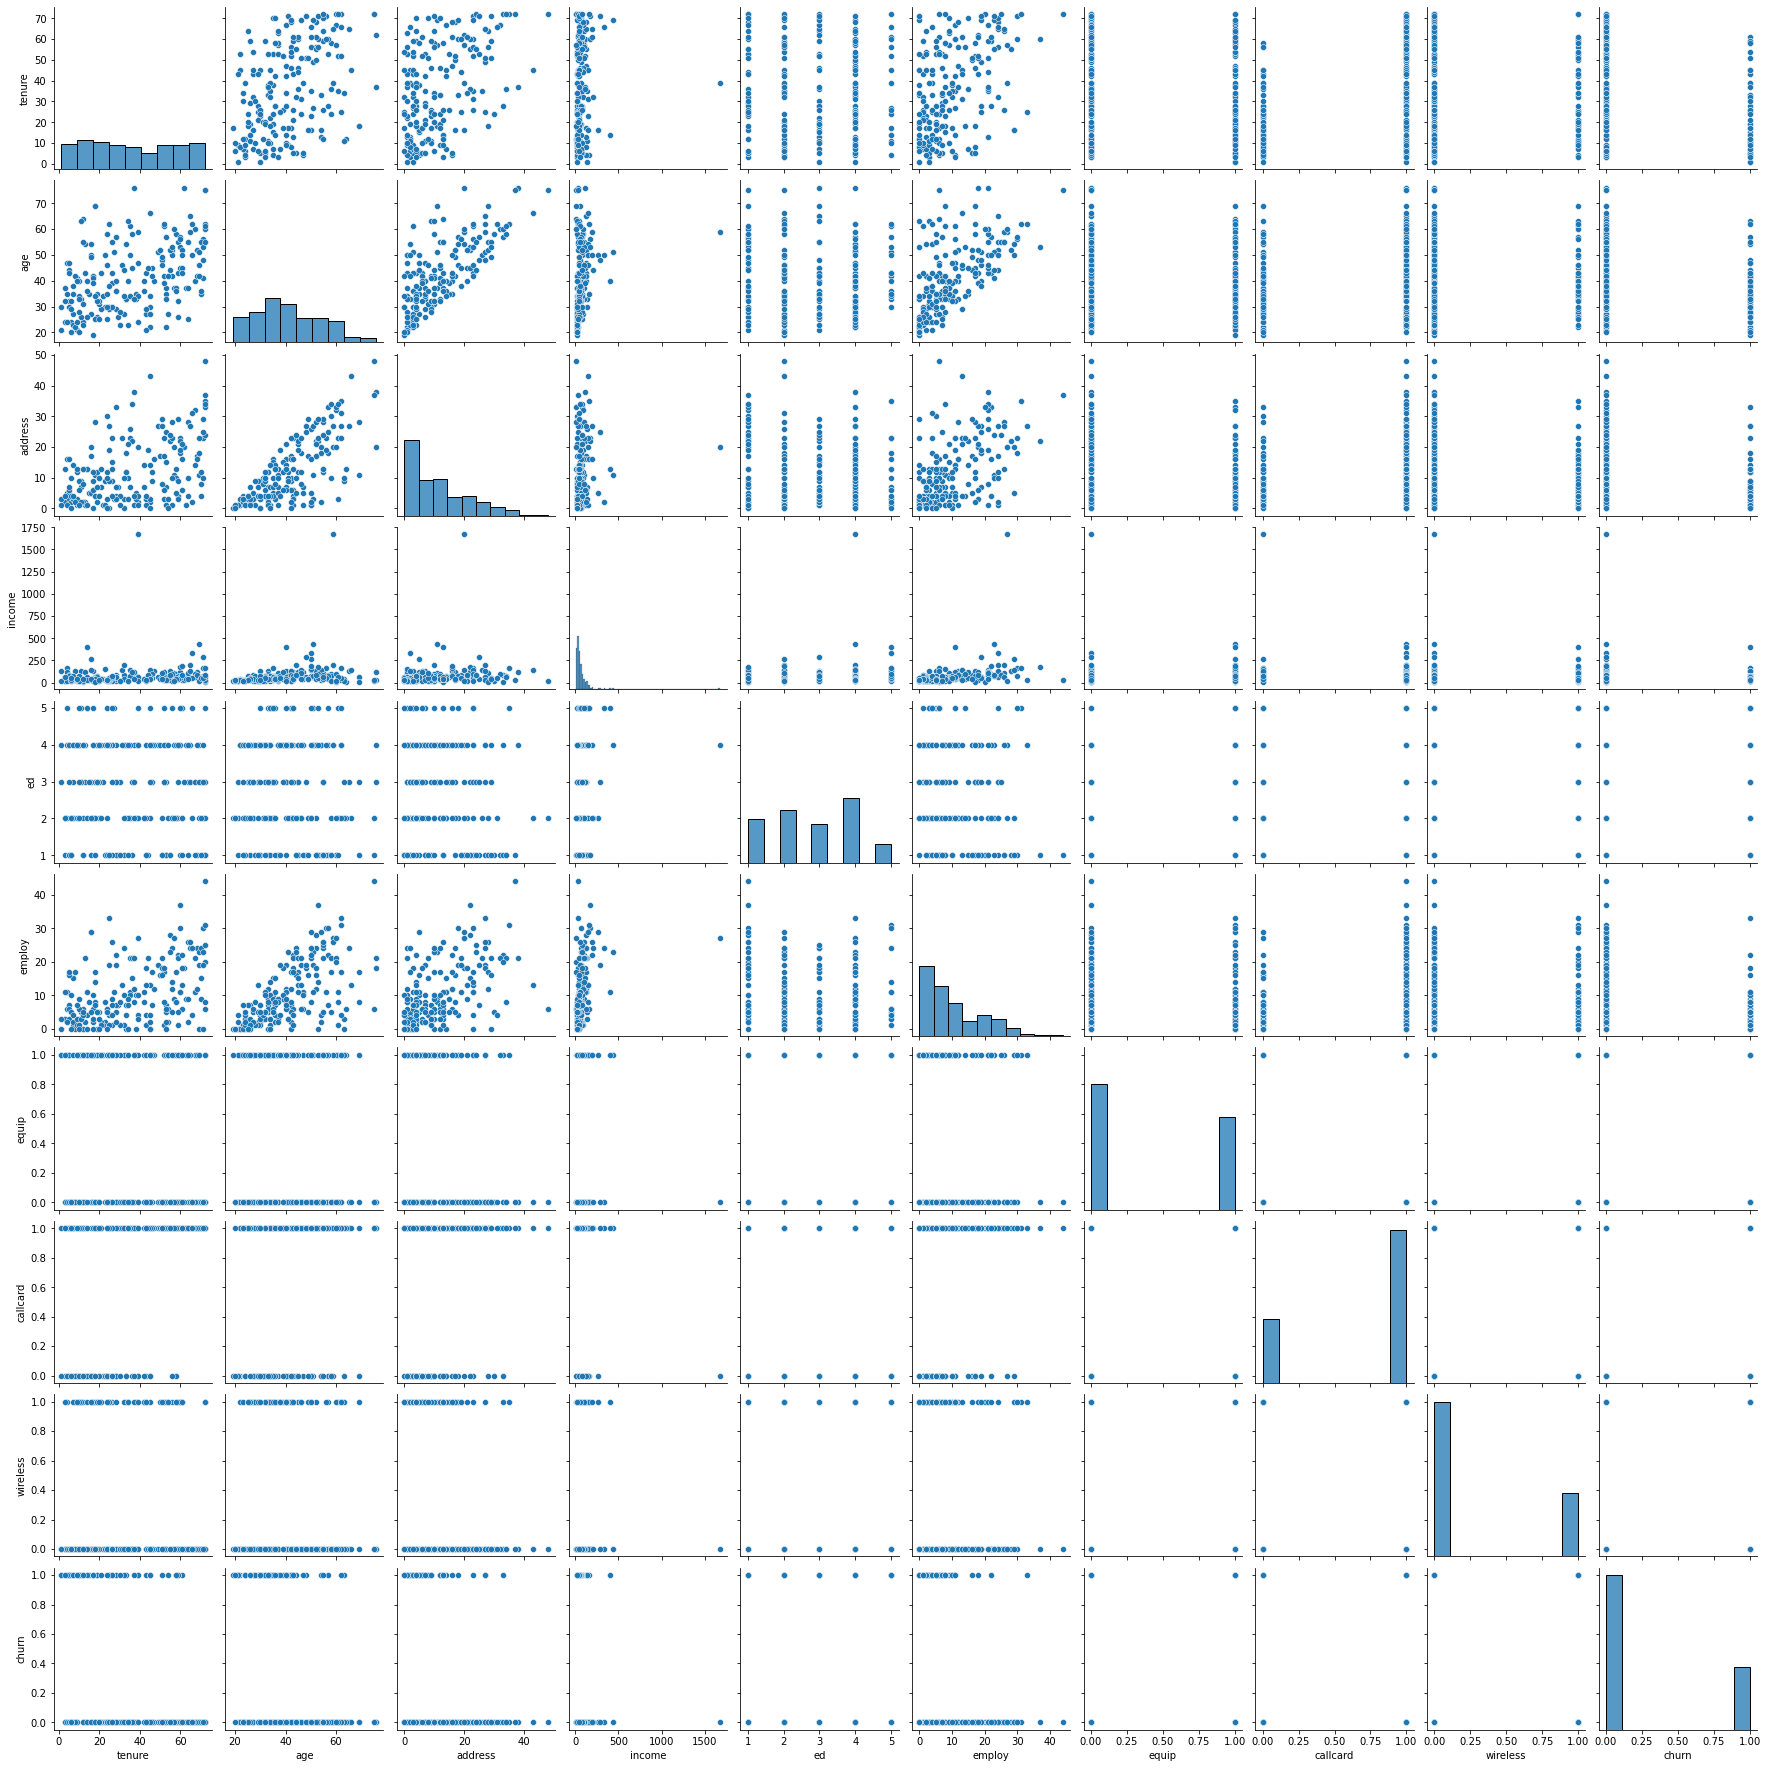

In [34]:
sns.pairplot(df)

## Data Preprocessing

In [35]:
X=np.asarray(df[["tenure","age","address","income","ed","employ","equip"]])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [23]:
y=np.asarray((df["churn"]))
y[0:5]

array([1, 1, 0, 0, 0])

Now, we normalize the dataset

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [46]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [47]:
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [51]:
print("Train Set: ", X_train.shape, Y_train.shape)
print("Test Set: ", X_test.shape, Y_test.shape)

Train Set:  (160, 7) (160,)
Test Set:  (40, 7) (40,)


## Modelling the Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
LR = LogisticRegression(C=0.1,solver='liblinear')

In [55]:
LR.fit(X_train,Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [56]:
yhat=LR.predict(X_test)

In [58]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

<b>predict_proba</b> returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)

In [59]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.64767463, 0.35232537],
       [0.82176729, 0.17823271],
       [0.72891356, 0.27108644],
       [0.85441058, 0.14558942],
       [0.73331569, 0.26668431],
       [0.65386776, 0.34613224],
       [0.66585389, 0.33414611],
       [0.80621898, 0.19378102],
       [0.32801549, 0.67198451],
       [0.8557654 , 0.1442346 ],
       [0.73154705, 0.26845295],
       [0.7907532 , 0.2092468 ],
       [0.53667203, 0.46332797],
       [0.37036435, 0.62963565],
       [0.83947561, 0.16052439],
       [0.59559711, 0.40440289],
       [0.57045125, 0.42954875],
       [0.59425185, 0.40574815],
       [0.55785766, 0.44214234],
       [0.67206081, 0.32793919],
       [0.81562381, 0.18437619],
       [0.58137606, 0.41862394],
       [0.87829351, 0.12170649],
       [0.53818345, 0.46181655],
       [0.56296549, 0.43703451],
       [0.91420316, 0.08579684],
       [0.58608915, 0.41391085],
       [0.60071461, 0.39928539],
       [0.63395468, 0.36604532],
       [0.92561551, 0.07438449],
       [0.

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


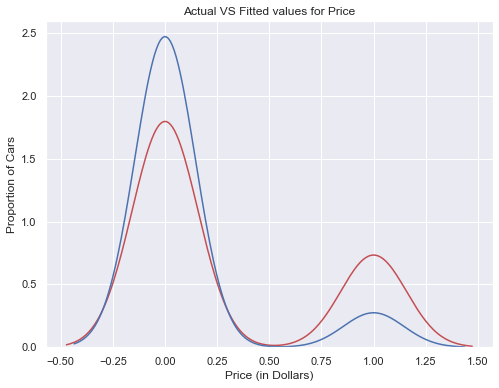

In [75]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
axl = sns.distplot(df["churn"],hist=False,color='r',label="Actual Value")
sns.distplot(yhat,color='b',hist=False,label="Fitted Value",ax=axl)

plt.title("Actual VS Fitted values for Price")
plt.xlabel("Price (in Dollars)")
plt.ylabel("Proportion of Cars")
plt.show()
plt.close()

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


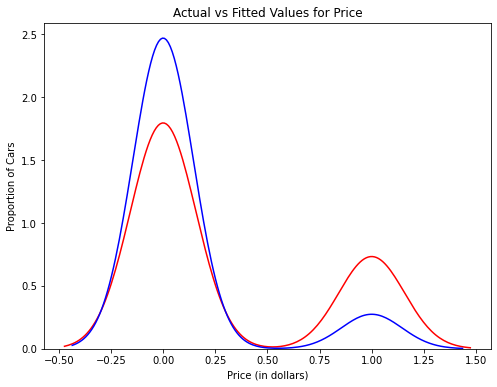